# Module - 6

# K-Nearest Neighbor Algorithm

In [1]:
import pandas as p
import numpy as n
import matplotlib.pyplot as plt
import seaborn as s

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=p.read_csv('child.csv')

In [4]:
data.head()

baseline_value  accelerations  fetal_movement  uterine_contractions  \
0             120          0.000             0.0                 0.000   
1             132          0.006             0.0                 0.006   
2             133          0.003             0.0                 0.008   
3             134          0.003             0.0                 0.008   
4             132          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                               73                                   0.5   
1                               17                                   2.1   
2                               16                                   2.1   
3                               16                                   2.4   
4                               16                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                                 43       ...             62   
1                                                  0       ...             68   
2                                                  0       ...             68   
3                                                  0       ...             53   
4                                                  0       ...             53   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0            126                          2                           0   
1            198                          6                           1   
2            198                          5                           1   
3            170                         11                           0   
4            170                          9                           0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0             120             137               121                  73   
1             141             136               140                  12   
2             141             135               138                  13   
3             137             134               137                  13   
4             137             136               138                  11   

   histogram_tendency  fetal_health  
0                   1             2  
1                   0             1  
2                   0             1  
3                   1             1  
4                   1             1  

[5 rows x 22 columns]

In [5]:
data.shape

(2126, 22)

In [6]:
df=data.dropna()

In [7]:
df.head()

baseline_value  accelerations  fetal_movement  uterine_contractions  \
0             120          0.000             0.0                 0.000   
1             132          0.006             0.0                 0.006   
2             133          0.003             0.0                 0.008   
3             134          0.003             0.0                 0.008   
4             132          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                               73                                   0.5   
1                               17                                   2.1   
2                               16                                   2.1   
3                               16                                   2.4   
4                               16                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                                 43       ...             62   
1                                                  0       ...             68   
2                                                  0       ...             68   
3                                                  0       ...             53   
4                                                  0       ...             53   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0            126                          2                           0   
1            198                          6                           1   
2            198                          5                           1   
3            170                         11                           0   
4            170                          9                           0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0             120             137               121                  73   
1             141             136               140                  12   
2             141             135               138                  13   
3             137             134               137                  13   
4             137             136               138                  11   

   histogram_tendency  fetal_health  
0                   1             2  
1                   0             1  
2                   0             1  
3                   1             1  
4                   1             1  

[5 rows x 22 columns]

In [8]:
df.shape

(2126, 22)

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2121    False
2122    False
2123    False
2124    False
2125    False
Length: 2126, dtype: bool

In [10]:
sum(df.duplicated())

13

In [11]:
df.isnull().sum()

baseline_value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [12]:
df.fetal_health.unique()

array([2, 1, 3], dtype=int64)

In [13]:
p.Categorical(df['fetal_health']).describe()

counts     freqs
categories                  
1             1655  0.778457
2              295  0.138758
3              176  0.082785

In [14]:
df.fetal_health.value_counts()

1    1655
2     295
3     176
Name: fetal_health, dtype: int64

In [15]:
df['label']=df.fetal_health.map({1:0, 2:1, 3:1})

In [16]:
df.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health', 'label'],
      dtype='object')

In [17]:
del df['fetal_health']

In [18]:
df.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'label'],
      dtype='object')

In [19]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='label', axis=1)
#Response variable
y = df.loc[:,'label']    

In [20]:
'''We'll use a test size of 30%. We also stratify the split on the response variable,
which is very important to do because there are so few fraudulent transactions'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))

Number of training dataset:  1488
Number of test dataset:  638
Total number of dataset:  2126


In [21]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knnc = KNeighborsClassifier()

knnc.fit(X_train,y_train)

predictK = knnc.predict(X_test)

print("")
print('Classification report of K-Nearest Neighbor Results:')
print("")
print(classification_report(y_test,predictK))

print("")
cm1=confusion_matrix(y_test,predictK)
print('Confusion Matrix result of K-Nearest Neighbor is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")

accuracy = cross_val_score(knnc, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold
print("")
print('Accuracy result of K-Nearest Neighbor is:',accuracy.mean()*100)
KN=accuracy.mean()*100


Classification report of K-Nearest Neighbor Results:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       497
           1       0.86      0.73      0.79       141

    accuracy                           0.91       638
   macro avg       0.89      0.85      0.87       638
weighted avg       0.91      0.91      0.91       638


Confusion Matrix result of K-Nearest Neighbor is:
 [[480  17]
 [ 38 103]]

Sensitivity :  0.96579476861167

Specificity :  0.7304964539007093

Cross validation test results of accuracy:
[0.86384977 0.86352941 0.87764706 0.84941176 0.72470588]

Accuracy result of K-Nearest Neighbor is: 83.5828776581055


In [23]:
def graph():
    import matplotlib.pyplot as plt
    data=[KN]
    alg="K-Nearest Neighbor Algorithm"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("b"))
    plt.title("Accuracy comparison of Child Mortality",fontsize=15)
    plt.legend(b,data,fontsize=9)

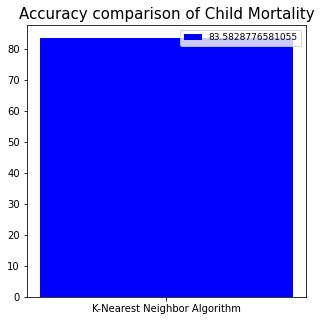

In [24]:
graph()

In [25]:
TP = cm1[0][0]
FP = cm1[1][0]
FN = cm1[1][1]
TN = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 480
True Negative : 17
False Positive : 38
False Negative : 103

True Positive Rate : 0.823327615780446
True Negative Rate : 0.3090909090909091
False Positive Rate : 0.6909090909090909
False Negative Rate : 0.17667238421955403

Positive Predictive Value : 0.9266409266409267
Negative predictive value : 0.14166666666666666


Confusion matrix-K-Nearest Neighbor:
[[480  17]
 [ 38 103]]


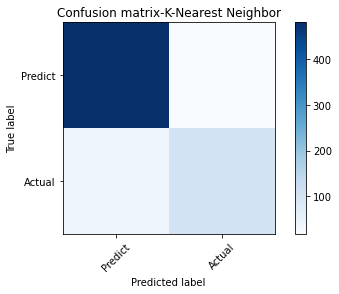

In [26]:
def plot_confusion_matrix(cm1, title='Confusion matrix-K-Nearest Neighbor', cmap=plt.cm.Blues):
    target_names=['Predict','Actual']
    plt.imshow(cm1, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = n.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm1=confusion_matrix(y_test, predictK)
print('Confusion matrix-K-Nearest Neighbor:')
print(cm1)
plot_confusion_matrix(cm1)